In [22]:
# 경고(warning) 메시지 비표시 설정
import warnings
warnings.filterwarnings("ignore")

# pandas 라이브러리 불러오기
import pandas as pd
import glob

In [23]:
!uv add lxml

Resolved 125 packages in 2ms
Audited 120 packages in 0.12ms


In [24]:
beachu_file = glob.glob("./data/배추가격/*.xls")

In [45]:
print(beachu_file)

['./data/배추가격\\가격정보202001-05.xls', './data/배추가격\\가격정보202006-10.xls', './data/배추가격\\가격정보202011-12.xls', './data/배추가격\\가격정보202101-05.xls', './data/배추가격\\가격정보202106-10.xls', './data/배추가격\\가격정보202111-12.xls', './data/배추가격\\가격정보202201-05.xls', './data/배추가격\\가격정보202206-10.xls', './data/배추가격\\가격정보202211-12.xls', './data/배추가격\\가격정보202301-05.xls', './data/배추가격\\가격정보202306-10.xls', './data/배추가격\\가격정보202311-12.xls']


In [62]:
beachu_file[2]

'./data/배추가격\\가격정보202011-12.xls'

In [ ]:
# beachu = pd.read_excel(beachu_file[0])
# beachu.head()
beachu = pd.DataFrame()
for i in beachu_file:
    # print(i)
    tmp = pd.read_html(i)[0]
    # print(tmp)
    beachu = pd.concat([beachu, tmp], axis=0, ignore_index=True)

In [69]:
beachu.head()

,구분,평균,전통시장,유통업체
0,2020.05.29,4667.0,5044.0,3868
1,등락률,4.9,1.8,5.4
2,2020.05.28,4450.0,4955.0,3668
3,2020.05.27,4497.0,4949.0,3799
4,2020.05.26,4449.0,4870.0,3799


In [70]:
beachu.tail()

,구분,평균,전통시장,유통업체
1007,2023.11.06,3517.0,5092.0,2584.0
1008,2023.11.03,3611.0,5151.0,2626.0
1009,2023.11.02,3604.0,5129.0,2628.0
1010,2023.11.01,4704.0,5289.0,4344.0
1011,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN


In [71]:
beachu = beachu[~(beachu["구분"].isin(["등락률", "소매가격"]))]

In [72]:
beachu.head()

,구분,평균,전통시장,유통업체
0,2020.05.29,4667.0,5044.0,3868
2,2020.05.28,4450.0,4955.0,3668
3,2020.05.27,4497.0,4949.0,3799
4,2020.05.26,4449.0,4870.0,3799
5,2020.05.25,4346.0,4683.0,3774


In [73]:
beachu.tail()

,구분,평균,전통시장,유통업체
1007,2023.11.06,3517.0,5092.0,2584.0
1008,2023.11.03,3611.0,5151.0,2626.0
1009,2023.11.02,3604.0,5129.0,2628.0
1010,2023.11.01,4704.0,5289.0,4344.0
1011,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN


In [74]:
beachu[beachu["평균"].isna()]

,구분,평균,전통시장,유통업체
102,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
209,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
253,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
356,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
461,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
507,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
610,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
714,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
759,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN
863,"소매가격 채소류, 배추, 전체, 상품, 1포기 기간별/일간/전통시장/유통...",NaN,NaN,NaN


In [75]:
beachu.dropna(subset="평균", inplace=True)
beachu.isna().mean() * 100

구분      0.0
평균      0.0
전통시장    0.0
유통업체    0.0
dtype: float64

In [76]:
beachu.shape

(988, 4)

In [77]:
from matplotlib.pyplot import plot
import seaborn as sns

In [78]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")  # Windows 기본 한글 폰트
plt.rc("axes", unicode_minus=False)  # 마이너스 부호 깨짐 방지

In [79]:
beachu["구분" ] = pd.to_datetime(beachu["구분"])

<Axes: xlabel='구분', ylabel='평균'>

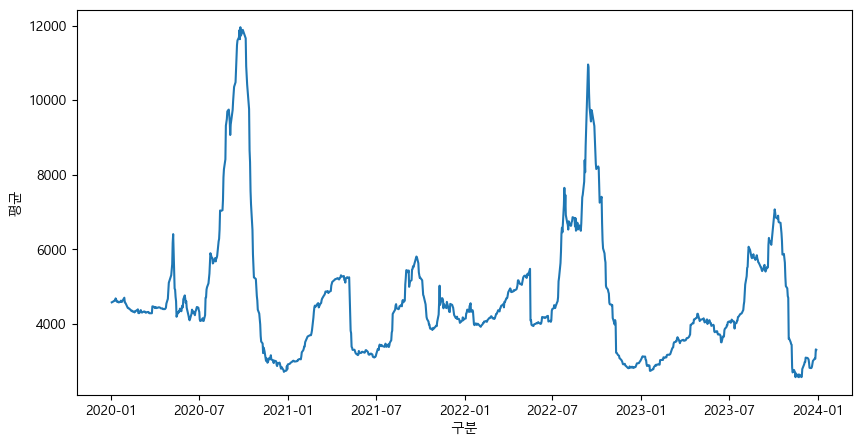

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(data=beachu,x="구분",y="평균")

In [81]:
beachu["구분_dt"] = pd.to_datetime(beachu["구분"], format="%Y%m")

In [83]:
beachu[beachu["구분_dt"] >= pd.to_datetime("202201",format = "%Y%m")]

,구분,평균,전통시장,유통업체,구분_dt
508,2022-05-31,4020.0,4504.0,3683,2022-05-31
510,2022-05-30,4033.0,4537.0,3683,2022-05-30
511,2022-05-27,4005.0,4518.0,3648,2022-05-27
512,2022-05-26,4002.0,4511.0,3632,2022-05-26
513,2022-05-25,4000.0,4498.0,3653,2022-05-25
...,...,...,...,...,...
1006,2023-11-07,3466.0,4905.0,2672.0,2023-11-07
1007,2023-11-06,3517.0,5092.0,2584.0,2023-11-06
1008,2023-11-03,3611.0,5151.0,2626.0,2023-11-03
1009,2023-11-02,3604.0,5129.0,2628.0,2023-11-02
